## Исследование сервиса аренды самокатов GoFast


У нас есть данные о некоторых пользователях из нескольких городов, а также об их поездках. Надо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться:

Без подписки

- абонентская плата отсутствует;

- стоимость одной минуты поездки — 8 рублей;

- стоимость старта (начала поездки) — 50 рублей;

С подпиской Ultra

- абонентская плата — 199 рублей в месяц;

- стоимость одной минуты поездки — 6 рублей;

- стоимость старта — бесплатно.

**Цель исследования**

- Изучение информации о пользователях и их поведения, оптимизацию бизнес-процессов, выявление потенциалов для улучшения и развития бизнеса GoFast.

**Ход исследования**

- Загрузка и предобработка данных;

- Исследовательский анализ данных;

- Объединение данных;

- Подсчёт выручки, исходя из условий оплаты по подписке и без неё;

- Проверка гипотез: о различиях в продолжительности поездок между пользователями с подпиской и без, среднем расстоянии поездок пользователей с подпиской, сравнении месячной выручки от разных категорий пользователей и влиянии технического обновления на количество обращений в техподдержку.

- Вывод.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

#### Загрузка данных

In [2]:
# читаем CSV-файлы с данными
df_users = pd.read_csv('/datasets/users_go.csv')

In [3]:
# выводим строки
df_users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
# смотрим информацию
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Пропущенные значения отсутствуют. Типы данных соответсвуют содержанию.

In [5]:
# выводим на экран количество строк-дубликатов
df_users.duplicated().sum()

31

Количество явных дубликатов - 31

In [6]:
# читаем CSV-файлы
df_riders = pd.read_csv('/datasets/rides_go.csv')
# выводим строки
df_riders.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [7]:
# смотрим информацию
df_riders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Пропущенные значения отсутствуют. Типы данных соответсвуют содержанию, за исключением date - тип object.

In [8]:
# выводим на экран количество строк-дубликатов
df_riders.duplicated().sum()

0

Явные дубликаты не обнаружены

In [9]:
# читаем CSV-файлы
df_subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')
# выводим строки
df_subscriptions.head(10)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [10]:
# смотрим информацию
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [11]:
# выводим на экран количество строк-дубликатов
df_subscriptions.duplicated().sum()

0

Явные дубликаты не обнаружены

##### Вывод:
Предоставлено 3 датафрейма. 

Названия столбцов приведены к общему стилю (snake_case), изменений не требуется.

**Качество данных:** В датафреймах отсутствуют пропущенные значения. Типы данных соответсвуют содержанию, кроме колоники date в датафрейме df_riders - она имеет тип object. Тип данных нужно поменять в ходе работы над проектом.

**Дубликаты:** Количество явных дубликатов - 31 в df_users

#### Предобработка данных

##### Приводим столбец date к типу даты

In [12]:
df_riders['date'] = pd.to_datetime(df_riders['date'], format='%Y-%m-%dT%H:%M:%S')
df_riders['date']

0       2021-01-01
1       2021-01-18
2       2021-04-20
3       2021-08-11
4       2021-08-28
           ...    
18063   2021-11-04
18064   2021-11-16
18065   2021-11-18
18066   2021-11-27
18067   2021-12-29
Name: date, Length: 18068, dtype: datetime64[ns]

##### Создаём новый столбец с номером месяца на основе столбца date.

In [13]:
# Проверяем минимальную и максимальную даты в датафрейме
print("Самая ранняя дата:", df_riders['date'].min())
print("Самая поздняя дата:", df_riders['date'].max())

Самая ранняя дата: 2021-01-01 00:00:00
Самая поздняя дата: 2021-12-30 00:00:00


Наши данные за 2021 год

In [14]:
# добавляем месяц публикации объявления, проверяем
df_riders['month_of_publication'] = df_riders['date'].dt.month
df_riders

,user_id,distance,duration,date,month_of_publication
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04,11
18064,1534,2840.423057,21.409799,2021-11-16,11
18065,1534,3826.185507,18.435051,2021-11-18,11
18066,1534,2902.308661,16.674362,2021-11-27,11


##### Проверяем минимальную и максимальную даты в датафрейме

##### Обработка пропущенных значений и дубликатов

Пропущенных значений в датафреймах нет, дубликаты были обнаружены в 'df_users'

In [15]:
# удаляем явные дубликаты
df_users = df_users.drop_duplicates().reset_index(drop=True)

In [16]:
# проверяем
df_users.duplicated().sum()

0

##### Вывод:
В датафреймах отсутствуют пропущенные значения. Типы данных везде соответсвуют содержанию, кроме колоники date в датафрейме df_users - она имела  тип object. Тип данных был изменен на date.

В датафрейме хранятся данные за 2021 год (с 1 января до 30 декабря).

В df_users найдено 31 явных дубликатов. В остальных явных дубликатов найдено не было.

Был создан новый датафрейм, объединяющий данные о пользователях, поездках и подписках. 

столбец с помесячной выручкой, которую принёс каждый пользователь.

#### Исследовательский анализ данных

##### Частота встречаемости городов

In [17]:
df_users.pivot_table(index='city', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)

,user_id
city,
Пятигорск,219
Екатеринбург,204
Ростов-на-Дону,198
Краснодар,193
Сочи,189
Омск,183
Тюмень,180
Москва,168


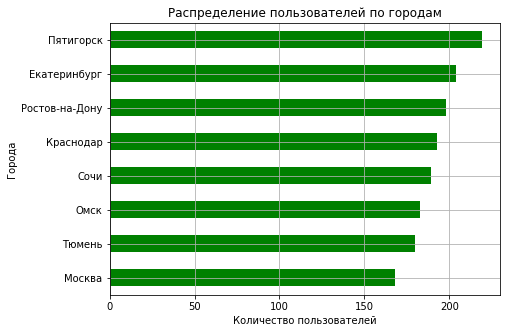

In [18]:
df_users.pivot_table(index='city', values='user_id', aggfunc='count'
                    ).sort_values(by='user_id', ascending=True,
                    ).plot(kind='barh', grid=True, figsize=(7, 5), legend=False, color='green')
plt.title('Распределение пользователей по городам')
plt.ylabel('Города')
plt.xlabel('Количество пользователей');

**Вывод:**
Максимальное количество пользователей в Пятигорске (219).
Высокие показатели в Екатеринбурге (204) и Ростове-на-Дону (198), Краснодаре (193) и Сочи (189).
Средние показатели в Омске (183) и Тюмени (180).
Москва находится в конце списка (168) Это может говорить о специфике собранных данных или о том, что бизнес сосредоточен вне столичного региона.

##### Соотношение пользователей с подпиской и без подписки

In [19]:
df_users['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

In [20]:
df_users['subscription_type'].value_counts(normalize=True)

free     0.544329
ultra    0.455671
Name: subscription_type, dtype: float64

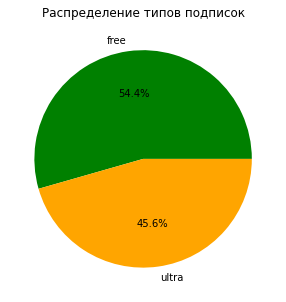

In [21]:
df_users.groupby(by='subscription_type')['subscription_type'].count(
        ).plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%', colors=['green', 'orange'])
plt.ylabel("")
plt.title('Распределение типов подписок');

**Вывод:**
Количество пользователей с бесплатной подпиской (free) составляет 835 (54%), количество пользователей с платной подпиской (ultra) - 699 (46%). 

Бесплатная версия услуги привлекает больше пользователей, что может быть связано с отсутствием финансовых барьеров для начала использования сервиса или с достаточным набором функций в бесплатной версии, удовлетворяющим потребности большинства пользователей.

Платная подписка (ultra) также пользуется высокой популярностью.

##### Возраст пользователей

In [23]:
df_users['age'].describe().to_frame()

,age
count,1534.000000
mean,24.903520
std,4.572367
min,12.000000
25%,22.000000
50%,25.000000
75%,28.000000
max,43.000000


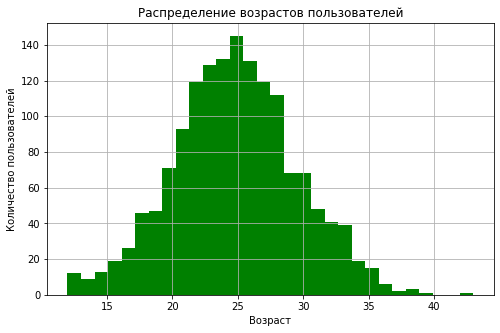

In [24]:
df_users['age'].hist(figsize=(8, 5), bins=30, color='green')
plt.title('Распределение возрастов пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей');

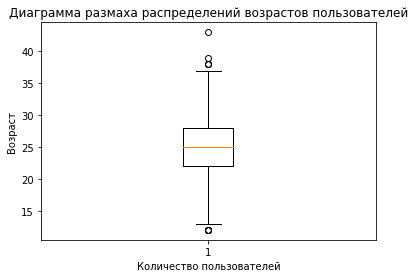

In [25]:
plt.boxplot(df_users['age'])
plt.title('Диаграмма размаха распределений возрастов пользователей')
plt.xlabel('Количество пользователей')
plt.ylabel('Возраст')
plt.show()

**Вывод:**
Средний возраст пользователей - примерно 24.9 лет.
Возраст пользователей варьируется от 12 до 43 лет.
Медианное значение (50-й перцентиль) возраста — 25 лет, что близко к среднему. 
Первый квартиль (25%) на уровне 22 лет и третий квартиль (75%) — 28 лет, что указывает на то, что большинство пользователей находятся в диапазоне от 22 до 28 лет.


Исходя из диаграммы размаха можно добавить, что межквартильный размах - от 22 до 28 лет, подтверждая, что большинство пользователей находятся в этом диапазоне.
Нижний и верхний "усы" показывают, что возраста всех пользователей колеблются примерно от 18 до 35 лет.
Имеются два выброса — один около 15 лет и другой около 40 лет.

##### Расстояние, которое пользователь преодолел за одну поездку

In [26]:
df_riders['distance'].describe().round(2).to_frame()

,distance
count,18068.00
mean,3070.66
std,1116.83
min,0.86
25%,2543.23
50%,3133.61
75%,3776.22
max,7211.01


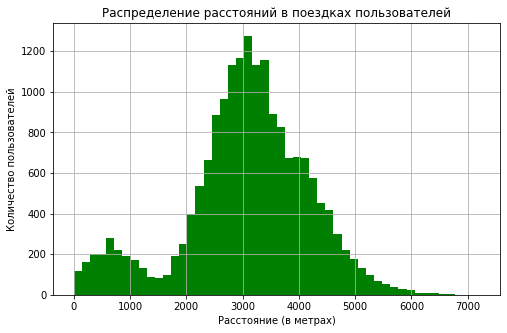

In [27]:
df_riders['distance'].hist(figsize=(8, 5), bins=50, color='green')
plt.title('Распределение расстояний в поездках пользователей')
plt.xlabel('Расстояние (в метрах)')
plt.ylabel('Количество пользователей');

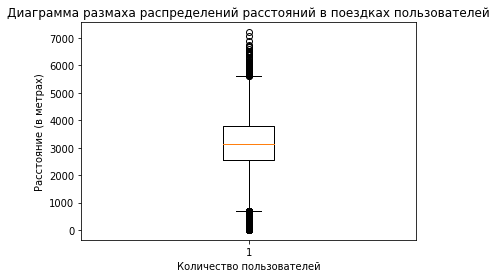

In [28]:
plt.boxplot(df_riders['distance'])
plt.title('Диаграмма размаха распределений расстояний в поездках пользователей')
plt.xlabel('Количество пользователей')
plt.ylabel('Расстояние (в метрах)')
plt.show()

**Вывод:** Среднее расстояние, которое пользователи преодолевают за одну поездку, составляет около 3070.66 метров.
Стандартное отклонение расстояния составляет 1116.83 метров, что указывает на значительный разброс значений относительно среднего. Это может говорить о разнообразии типов поездок среди пользователей (краткосрочные против длительных).
Минимальное зарегистрированное расстояние составляет всего около 0.86 метра, что может быть связано с ошибками регистрации или очень короткими поездками. Максимальное расстояние - 7211.01 метров.

Гистограмма выглядит как 2 нормальных распределения с малым пиком около 700 метров и большим пиком около 3200 метров. 
Всплеск значений расстояний от 0 до 1500 метров может указывать на короткие поездки по городу, между близко расположенными точками, такими как дом, работа, магазины или кафе или ошибки.

На диаграмме размаха медиана - около 3000 метров, межквартильный размах - от 2000 до 4000 метров.
Выбросы - от 5000 до 7000 метров и меньше 800 метров.

Квартильное распределение: 25% всех поездок короче 2543.23 метра. Медиана - 3133.61 метра. 75% всех поездок короче 3776.22 метра.

##### Продолжительность поездок

In [29]:
df_riders['duration'].describe().round(2).to_frame()

,duration
count,18068.00
mean,17.81
std,6.09
min,0.50
25%,13.60
50%,17.68
75%,21.72
max,40.82


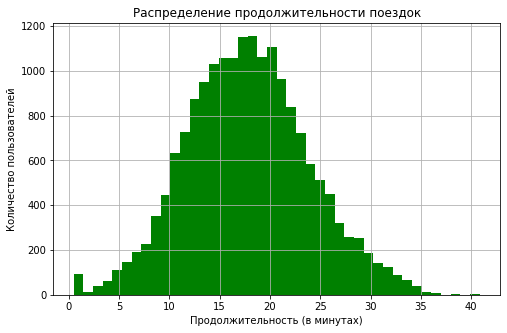

In [30]:
df_riders['duration'].hist(bins=42, figsize=(8, 5), color='green')
plt.title('Распределение продолжительности поездок')
plt.xlabel('Продолжительность (в минутах)')
plt.ylabel('Количество пользователей');

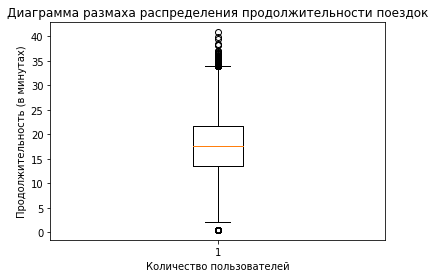

In [31]:
plt.boxplot(df_riders['duration'])
plt.title('Диаграмма размаха распределения продолжительности поездок')
plt.xlabel('Количество пользователей')
plt.ylabel('Продолжительность (в минутах)')
plt.show()

In [32]:
# смотрим, сколько поездок продолжительностью 0.5 минуты
df_riders[df_riders['duration'] == 0.5].shape[0]

95

In [33]:
df_riders[df_riders['duration'] < 1].shape[0]

95

**Вывод:**
Средняя продолжительность поездки составляет приблизительно 17.81 минут.
Минимальная продолжительность поездки составляет всего 0.5 минуты. На графике виден небольшой пик около 0.5 минуты (95 поездок). Скорее всего это ошибки регистрации.
Максимальная продолжительность — 40.82 минуты.
Квартильное распределение:
25% квартиль (Q1): 13.60 минут, что означает, что 25% всех поездок длится менее 13.60 минут.
Медиана (50% квартиль): 17.68 минут, указывает на то, что половина всех поездок длится меньше или около этого времени. Это значение очень близко к среднему, что подтверждает симметричность распределения.
75% квартиль (Q3): 21.72 минут, означает, что 75% всех поездок длится меньше 21.72 минут.

Исходя из диаграммы размаха, межквартильный размах располагается между 10 и 20 минутами (большинство поездок).
Выбросы: от 34 до 40 минут и один выбросоколо 1-2 минуты.

##### Вывод

**Частота встречаемости городов**
Максимальное количество пользователей в Пятигорске (219). Высокие показатели в Екатеринбурге (204) и Ростове-на-Дону (198), Краснодаре (193) и Сочи (189). Средние показатели в Омске (183) и Тюмени (180). Москва находится в конце списка (168).

**Соотношение пользователей с подпиской и без подписки**
Количество пользователей с бесплатной подпиской (free) составляет 835 (54%), количество пользователей с платной подпиской (ultra) - 699 (46%).


**Возраст пользователей**
Возраст пользователей варьируется от 12 до 43 лет. Средний возраст пользователей - 24.9 лет, медианный — 25 лет. Большинство пользователей находятся в диапазоне от 22 до 28 лет (первый квартиль (25%) на уровне 22 лет и третий квартиль (75%) — 28 лет).

**Расстояние, которое пользователь преодолел за одну поездку**
Среднее расстояние - 3070.66 метров, медианное - 3133.61 метра. Минимальное зарегистрированное расстояние - 0.86 метра, максимальное - 7211.01 метров.
Есть 2 пика: маленький около 700 метров (короткие поездки по городу) и большой около 3200 метров.


**Продолжительность поездок**
Средняя продолжительность поездки - 17.81 минут, медианная - 17.68 минут. Минимальная - 0.5 минуты, максимальная — 40.82 минуты. 25% всех поездок длится менее 13.60 минут, 75% всех поездок короче 21.72 минут.

#### Объединение данных

##### Объединяем данные о пользователях, поездках и подписках в один датафрейм.

In [34]:
# Проверяем размерности датасетов
print("Размер df_users:", df_users.shape)
print("Размер df_riders:", df_riders.shape)
print("Размер df_subscriptions:", df_subscriptions.shape)

Размер df_users: (1534, 5)
Размер df_riders: (18068, 5)
Размер df_subscriptions: (2, 4)


In [35]:
# сначала создаём промежуточную таблицу
df_sub = df_users.merge(df_riders, on='user_id')
# потом итоговую 
df_total = df_sub.merge(df_subscriptions, on='subscription_type')
# смотрим
df_total

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_publication,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [36]:
print("Размер финального датафрейма:", df_total.shape)

Размер финального датафрейма: (18068, 12)


Ожидаемое количество строк соответствует количеству поездок.

##### Создаём ещё два датафрейма из общего датафрейма:

In [37]:
# пользователи с подпиской
df_ultra = df_total[df_total['subscription_type'] == 'ultra']
df_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_publication,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


In [38]:
# пользователи без подписки
df_free = df_total[df_total['subscription_type'] == 'free']
df_free

,user_id,name,age,city,subscription_type,distance,duration,date,month_of_publication,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


11568 строк в использовании без подписки и 6500 - с подпиской.

##### Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий.

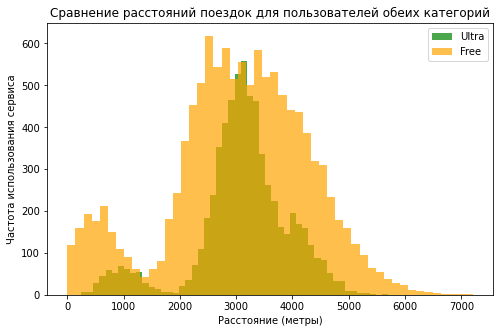

In [39]:
# Строим гистограммы для сравнения расстояний
plt.figure(figsize=(8, 5))
plt.hist(df_ultra['distance'], alpha=0.7, label='Ultra', color='green', bins=50)
plt.hist(df_free['distance'], alpha=0.7, label='Free', color='orange', bins=50)
plt.title('Сравнение расстояний поездок для пользователей обеих категорий')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Частота использования сервиса')
plt.legend();

Обе группы показывают бимодальное распределение расстояний. Первый пик - в районе 1000 метров, второй пик - около 3000-4000 метров. У группы "Ultra" более высокая частота поездок на расстояния около 3000-4000 метров, в то время как для группы "Free" характерен более ровный спад после первого пика. Распределение расстояний у группы "Free" шире, что указывает на большее разнообразие выбора расстояний среди этих пользователей.
Пользователи с подпиской "Ultra" использовать сервис для более регулярных или длительных поездок (маршруты на работы и обратно, например).



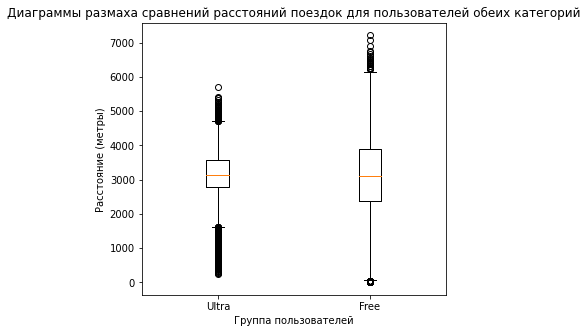

In [40]:
# Box plot для расстояний
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.boxplot([df_ultra['distance'], df_free['distance']], labels=['Ultra', 'Free'])
plt.title('Диаграммы размаха сравнений расстояний поездок для пользователей обеих категорий')
plt.xlabel('Группа пользователей')
plt.ylabel('Расстояние (метры)');

Медианы обеих групп находятся примерно на одном уровне. Возможно, обе группы используют услугу для схожих целей.
Межквартильный размах и общий разброс значений (от минимального до максимального, включая выбросы) у группы "Free" больше, чем у "Ultra". Это указывает на большую изменчивость в выборе расстояний поездок среди пользователей без подписки.
Группа "Free" имеет большее количество выбросов на больших расстояниях, что может указывать на наличие пользователей, которые иногда совершают очень длинные или очень короткие поездки. У "Ultra" также есть выбросы, но их меньше.
Верхний "ус" (который показывает максимальное значение без учёта выбросов) длиннее у группы "Free", подтверждая большую вариативность в длинных поездках у пользователей без подписки. Нижний "ус" начинается примерно с одинаковых значений, что говорит о схожести минимальных дистанций у обеих групп.

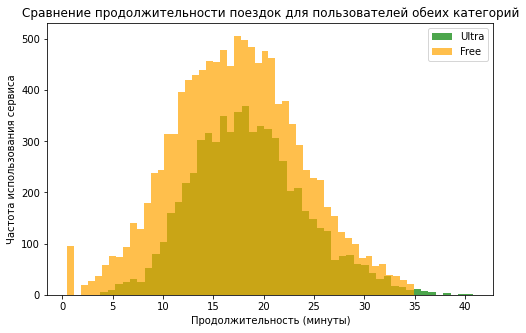

In [41]:
# Строим гистограммы для сравнения продолжительности поездок
plt.figure(figsize=(8, 5))
plt.hist(df_ultra['duration'], alpha=0.7, label='Ultra', color='green', bins=50)
plt.hist(df_free['duration'], alpha=0.7, label='Free', color='orange', bins=50)
plt.title('Сравнение продолжительности поездок для пользователей обеих категорий')
plt.xlabel('Продолжительность (минуты)')
plt.ylabel('Частота использования сервиса')
plt.legend();

Наибольшее количество поездок для обеих групп длятся 15-20 минут.
Пик продолжительности поездок пользователей "Free" находится чуть левее, чем у пользователей "Ultra". Это может означать, что пользователи без подписки склонны совершать несколько более короткие поездки по сравнению с теми, у кого подписка "Ultra".
Распределение для обеих групп скошено вправо, что означает наличие относительно немногих поездок с очень длинной продолжительностью. Такие длинные поездки встречаются реже, но они есть в обеих группах.

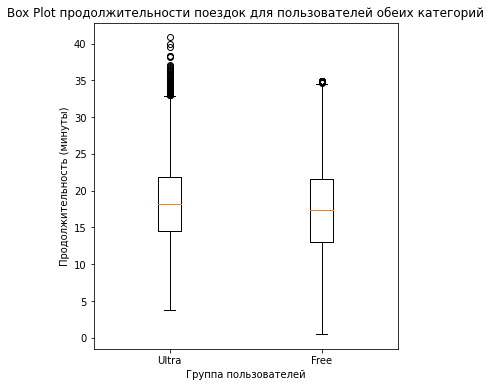

In [42]:
# Box plot для продолжительности
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot([df_ultra['duration'], df_free['duration']], labels=['Ultra', 'Free'])
plt.title('Box Plot продолжительности поездок для пользователей обеих категорий')
plt.xlabel('Группа пользователей')
plt.ylabel('Продолжительность (минуты)');

Распределение продолжительности поездок схоже для обеих категорий, но у "Ultra" есть несколько более длинные поездки.

Медианы и межквартильный размах почти совпадают.
Верхний "ус" показывает, что поездки, не считая выбросов, для обеих групп редко превышают 30 минут. Нижний "ус" начинается примерно от 4 минут для "Ultra" и от 2 минут для "Free".
У "Ultra" присутствуют поездки, продолжительность которых достигает почти 40 минут (выбросы), что выше, чем у "Free". Это может указывать на наличие небольшого числа поездок с особенно большой продолжительностью среди пользователей с подпиской "Ultra".

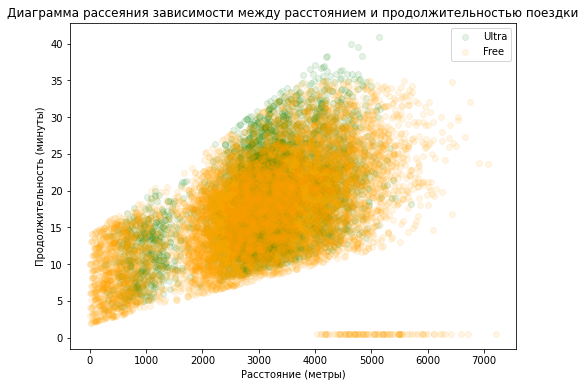

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(df_ultra['distance'], df_ultra['duration'], color='green', label='Ultra', alpha=0.1)
plt.scatter(df_free['distance'], df_free['duration'], color='orange', label='Free', alpha=0.1)
plt.title('Диаграмма рассеяния зависимости между расстоянием и продолжительностью поездки')
plt.xlabel('Расстояние (метры)')
plt.ylabel('Продолжительность (минуты)')
plt.legend();

Диаграмма рассеяния показывает чёткую положительную корреляцию между расстоянием и продолжительностью поездок для обеих групп (с увеличением расстояния растет продолжительность поездок). 
Наибольшая плотность точек сосредоточена в диапазоне от 0 до 3000 метров и от 5 до 25 минут.
Зелёные точки (пользователи "Free") покрывают более широкий диапазон и более плотно распределены на графике, что указывает на большее количество поездок по сравнению с "Ultra".
Синие точки ("Ultra") имеют меньший разброс, особенно на больших расстояниях и продолжительностях.

##### Вывод:
Пользователи "Ultra" склонны к более регулярным и длительным поездкам, тогда как "Free" демонстрируют более разнообразные и менее предсказуемые модели поездок.

**Сравнение расстояний**: 
На гистаграмме обе группы показывают бимодальное распределение расстояний. Первый пик - в районе 1000 метров, второй пик - около 3000-4000 метров. Пользователи "Ultra" чаще выбирают длинные поездки (3000-4000 м), в то время как пользователи "Free" показывают большее разнообразие.
На основе Box plot: Обе группы имеют схожие медианы, но у "Free" значительно больше разброс и выбросы в данных, что указывает на более разнообразное использование сервиса по сравнению с более предсказуемыми паттернами поездок у "Ultra".

**Сравнение продолжительности поездок:**
Гистаграмма продолжительности поездок пользователей с подписками "Ultra" и "Free" показала, что большинство поездок для обеих групп длится 15-20 минут, при этом пользователи "Free" склонны к немного более коротким поездкам. Гистограммы обеих групп скошены вправо, указывая на наличие редких длинных поездок. Box plot анализ выявил схожесть в медианах и межквартильных размахах, однако у "Ultra" заметны более длинные поездки, достигающие до 40 минут, что отражает наличие верхних выбросов по сравнению с "Free".

Диаграмма рассеяния подтверждает положительную корреляцию между расстоянием и продолжительностью поездок.

#### Подсчёт выручки

Находим суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [44]:
# Округляем продолжительность поездок с помощью «потолка»
df_total['duration'] = np.ceil(df_total['duration'])
df_total['distance'] = np.ceil(df_total['distance'])

# Создаем сводную таблицу с данными о поездках
df_pivot = df_total.pivot_table(index=['user_id', 'month_of_publication'], 
                                values = ['distance', 'duration', 'name', 'subscription_type'], 
                                aggfunc={'distance':'sum', 'duration':'sum', 'name':'count',
                                         'subscription_type': 'min'})

df_pivot.columns = ['distance_total', 'duration_total', 'ride_count', 'subscription_type']

df_pivot.head(20)

distance_total  duration_total  ride_count  \
user_id month_of_publication                                               
1       1                             7028.0            42.0           2   
        4                              755.0             7.0           1   
        8                             6724.0            46.0           2   
        10                            5811.0            32.0           2   
        11                            7005.0            56.0           3   
        12                            6753.0            28.0           2   
2       3                            10190.0            63.0           3   
        4                             6165.0            40.0           2   
        6                             3256.0            14.0           1   
        7                             6781.0            48.0           2   
        8                              924.0             7.0           1   
        10                            2825.0            19.0           1   
        12                            3829.0            12.0           1   
3       1                             3062.0            13.0           1   
        2                             5422.0            39.0           2   
        4                             2957.0            21.0           1   
        5                             9065.0            63.0           3   
        7                            10921.0            67.0           3   
        9                             2892.0            23.0           1   
        12                            2594.0            13.0           1   

                             subscription_type  
user_id month_of_publication                    
1       1                                ultra  
        4                                ultra  
        8                                ultra  
        10                               ultra  
        11                               ultra  
        12                               ultra  
2       3                                ultra  
        4                                ultra  
        6                                ultra  
        7                                ultra  
        8                                ultra  
        10                               ultra  
        12                               ultra  
3       1                                ultra  
        2                                ultra  
        4                                ultra  
        5                                ultra  
        7                                ultra  
        9                                ultra  
        12                               ultra

In [45]:
# Делаем проверку на пропуски в сводной таблице
print("Пропущенные значения в сводной таблице:\n", df_pivot.isnull().sum())

Пропущенные значения в сводной таблице:
 distance_total       0
duration_total       0
ride_count           0
subscription_type    0
dtype: int64


In [46]:
# Добавляем столбец с помесячной выручкой, которую принёс каждый пользователь

# Cчитаем помесячную выручка для 'ultra'
df_pivot.loc[df_pivot['subscription_type'] == 'ultra', 'income'] = (df_pivot['duration_total'] * 6) + 199

# Cчитаем помесячную выручка для 'free'
df_pivot.loc[df_pivot['subscription_type'] == 'free', 'income'] = (df_pivot['ride_count'] * 50) + (df_pivot['duration_total'] * 8)

df_pivot.head(20)

distance_total  duration_total  ride_count  \
user_id month_of_publication                                               
1       1                             7028.0            42.0           2   
        4                              755.0             7.0           1   
        8                             6724.0            46.0           2   
        10                            5811.0            32.0           2   
        11                            7005.0            56.0           3   
        12                            6753.0            28.0           2   
2       3                            10190.0            63.0           3   
        4                             6165.0            40.0           2   
        6                             3256.0            14.0           1   
        7                             6781.0            48.0           2   
        8                              924.0             7.0           1   
        10                            2825.0            19.0           1   
        12                            3829.0            12.0           1   
3       1                             3062.0            13.0           1   
        2                             5422.0            39.0           2   
        4                             2957.0            21.0           1   
        5                             9065.0            63.0           3   
        7                            10921.0            67.0           3   
        9                             2892.0            23.0           1   
        12                            2594.0            13.0           1   

                             subscription_type  income  
user_id month_of_publication                            
1       1                                ultra   451.0  
        4                                ultra   241.0  
        8                                ultra   475.0  
        10                               ultra   391.0  
        11                               ultra   535.0  
        12                               ultra   367.0  
2       3                                ultra   577.0  
        4                                ultra   439.0  
        6                                ultra   283.0  
        7                                ultra   487.0  
        8                                ultra   241.0  
        10                               ultra   313.0  
        12                               ultra   271.0  
3       1                                ultra   277.0  
        2                                ultra   433.0  
        4                                ultra   325.0  
        5                                ultra   577.0  
        7                                ultra   601.0  
        9                                ultra   337.0  
        12                               ultra   277.0

##### Вывод:
Помесячная выручка, которую принёс каждый пользователь, посчитана, столбец с этими данными добавлен

#### Проверка гипотез

##### Тратят ли пользователи с подпиской больше времени на поездки

Данный случай может быть рассмотрен с помощью гипотезы о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза - пользователи с подпиской и без подписки тратят одинаковое время на поездки;

Альтернативная гипотеза - пользователи с подпиской тратят больше времени на поездки

In [47]:
# уровень статистической значимости
alpha = 0.05 

results = st.ttest_ind(df_ultra['duration'], 
                       df_free['duration'], 
                       alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.2804098316645618e-34
Отвергаем нулевую гипотезу


**Вывод:**
Пользователи с подпиской тратят больше времени на поездки (что также можно заметить по построенным ранее гистаграммам для сравнения продолжительности поездок, так как у пользователей с подпиской меньше совсем коротких поездок и больше совсем длительных)

##### Превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 метров

Проведем проверку односторонней гипотезы в Python
Оптимальное расстояние одной поездки с точки зрения износа самоката - 3130 метров.

Нулевая гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров.

Альтернативная гипотеза - среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров.

In [48]:
optimal_distance = 3130

# уровень статистической значимости
alpha = 0.05

results_2 = st.ttest_1samp(df_ultra['distance'], 
                           optimal_distance, 
                           alternative='greater')

print('p-значение:', results_2.pvalue)

if (results_2.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.9195368847849785
Не отвергаем нулевую гипотезу


**Вывод:**
Нельзя утверждать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров

##### Превышает ли помесячная выручка от пользователей с подпиской выручку от пользователей без подписки

Используем гипотезу о равенстве средних двух генеральных совокупностей.

Нулевая гипотеза - помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки.

Альтернативная гипотеза - помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки.

In [49]:
# уровень статистической значимости
alpha = 0.05 

income_ultra = df_pivot[df_pivot['subscription_type'] == 'ultra']['income']
income_free = df_pivot[df_pivot['subscription_type'] == 'free']['income']

results = st.ttest_ind(income_ultra, income_free, 
                       alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.8850394384715216e-31
Отвергаем нулевую гипотезу


**Вывод:** Помесячная выручка от пользователей с подпиской превышает выручку от пользователей без подписки

##### Вопрос о виде теста 

Ситуация: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Ответ: Гипотеза о равенстве средних для зависимых (парных) выборок или гипотеза о равенстве среднего значения генеральной совокупности до и после изменения

#### Распределения

#### Общий вывод

##### Предобработка данных с описанием найденных проблем и путей их решения

Данные были предоставлены в виде 3х датафреймах. 

**Качество данных:** В датафреймах отсутствуют пропущенные значения. Типы данных везде соответсвуют содержанию, кроме колоники date в датафрейме df_users - она имела  тип object. Тип данных был изменен на date.

**Дубликаты:** В датафрейме df_users найдено 31 явных дубликатов. В остальных явных дубликатов найдено не было.

Был создан новый датафрейм, объединяющий данные о пользователях, поездках и подписках. 

**Добавлены новые столбцы**: 
столбец с помесячной выручкой, которую принёс каждый пользователь.


##### Выводы по исследовательскому анализу данных

**Частота встречаемости городов** Максимальное количество пользователей в Пятигорске (219). Высокие показатели в Екатеринбурге (204) и Ростове-на-Дону (198), Краснодаре (193) и Сочи (189). Средние показатели в Омске (183) и Тюмени (180). Москва находится в конце списка (168).

**Соотношение пользователей с подпиской и без подписки** - без подписки 835 (54%), с подпиской (ultra) - 699 (46%).


**Возраст пользователей** варьируется от 12 до 43 лет. Средний возраст - 24.9 лет, медианный — 25 лет. Большинство пользователей находятся в диапазоне от 22 до 28 лет (первый квартиль (25%) на уровне 22 лет и третий квартиль (75%) — 28 лет).

**Расстояние, которое пользователь преодолел за одну поездку** Среднее - 3070.66 метров, медианное - 3133.61 метра. Минимальное зарегистрированное расстояние - 0.86 метра, максимальное - 7211.01 метров.
Есть 2 пика: маленький около 700 метров (короткие поездки по городу) и большой около 3200 метров.

**Продолжительность поездок** Средняя - 17.81 минут, медианная - 17.68 минут. Минимальная - 0.5 минуты, максимальная — 40.82 минуты. 25% всех поездок длится менее 13.60 минут, 75% всех поездок короче 21.72 минут.


**Сравнение информации о расстоянии и времени поездок для пользователей обеих категорий** Пользователи "Ultra" склонны к более регулярным и длительным поездкам, тогда как "Free" демонстрируют более разнообразные и менее предсказуемые модели поездок.

**Сравнение расстояний**: Пользователи "Ultra" чаще выбирают длинные поездки (3000-4000 м), в то время как пользователи "Free" показывают большее разнообразие.
На основе Box plot: Обе группы имеют схожие медианы, но у "Free" значительно больше разброс и выбросы в данных, что указывает на более разнообразное использование сервиса по сравнению с более предсказуемыми паттернами поездок у "Ultra".

**Сравнение продолжительности поездок:** большинство поездок для обеих групп длится 15-20 минут, при этом пользователи "Free" склонны к немного более коротким поездкам, а у "Ultra" заметны более длинные поездки, достигающие до 40 минут, что отражает наличие верхних выбросов по сравнению с "Free".


##### Выводы по проверке гипотез

**Тратят ли пользователи с подпиской больше времени на поездки**
Да, пользователи с подпиской тратят больше времени на поездки

**Превышает ли среднее расстояние, которое проезжают пользователи с подпиской за одну поездку 3130 метров**
Нельзя это утверждать (не отвергаем нулевую гипотезу)

**Превышает ли помесячная выручка от пользователей с подпиской выручку от пользователей без подписки**
Да, превышает

##### Рекомендации для заказчика:

**Улучшение программы подписок:** Так как пользователи с подписками приноят больше выручки, возможно стоит доработать условия, дополнительные льготы или скидки на длинные поездки. Также можно разработать специальные предложения для привлечения пользователей "Free" к переходу на подписки.

**Продвижение длинных поездок:** Для пользователей "Ultra", которые предпочитают длинные поездки, предложить особые условия для регулярных поездок. Это может увеличить лояльность клиентов.

**Пересмотр тарифов:** Проанализировать и оптимизировать структуру ценообразования, возможно, введя отдельные тарифы по времени суток или дням недели.

**Улучшение пользовательского опыта:** Внедрить новые функции, такие как:
- Предложения маршрутов на основе анализа наиболее популярных направлений.
- Личные рекомендации по оптимизации расходов на поездки.
- Улучшенная навигация и возможности планирования поездок.